<a href="https://colab.research.google.com/github/othoni-hub/ECG1/blob/main/Ch16_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CPGE-ECG1** 
<img src="https://drive.google.com/uc?id=12Wo3LubGGT4qOvYFAuLP4CyCuwjKNVuk" width="230" height="150" align = "right"/>

## **Ch16 - Notebook : Lois Discrètes**




**O.Thöni - Lycée Saint-Charles Sainte Croix - LE MANS**

## **1. Simulation de la loi uniforme discrète**
Simulation d'un grand nombre de tirages entiers uniformes sur [[a;b]]

In [27]:
import numpy.random as rd
import numpy as np
from math import floor

**un tirage :**

In [28]:
def uniforme(a,b) :
    n = b-a+1       # nombre de valeurs entre a et b, bornes incluses
    x = rd.random() # tirage d'un nombre flottant entre 0 et 1
    x = x*n         # obtention d'un nombre flottant aléatoire entre 0 et n
    x = x+a         # obtention d'un nombre flottant aléatoire entre a et a+n = a+b-a+1=b+1 (b+1 exclu !)
    x = floor(x)    # obtention d'un nombre entier aléatoire entre a et b inclus
    return x

In [29]:
a=2
b=8
uniforme(a,b)

8

**N tirages**

In [30]:
def echantillon_uniforme(a,b,N) :
    u = []
    for i in range(N):
        u = u + [uniforme(a,b)]
    return u

In [31]:
N = 20
echantillon_uniforme(a,b,N)

[4, 6, 8, 4, 4, 8, 6, 3, 8, 8, 7, 3, 6, 7, 2, 2, 4, 5, 7, 2]

**Graphique**

In [32]:
import matplotlib.pyplot as plt

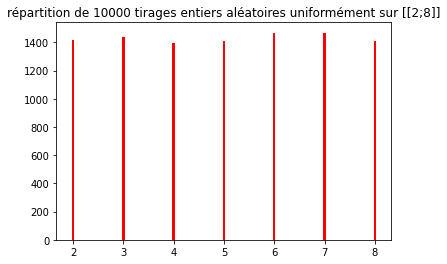

In [33]:
N = 10000
a=2
b=8
U = echantillon_uniforme(a,b,N)           # N tirages entiers uniformément sur [[a;b]]
X_Omega = list(range(a,b+1))    # Univers 

Effectifs = np.array([len([x for x in U if x == i]) for i in X_Omega])  # tabulation des N tirages

# diagramme en bâtons des effectifs
plt.bar(X_Omega,Effectifs, width = 0.05, color = 'red')
plt.title('répartition de '+str(N)+' tirages entiers aléatoires uniformément sur [['+str(a)+';'+str(b)+']]')
plt.show()

# ***Révisions du TP0***

## **2. Simulation de la loi de Bernoulli**

***(notions travaillées : import d'une bibliothèque, random())***


In [ ]:
import numpy.random as rd

* **Simulation d'un tirage de Bernoulli**

Simuler un tirage de Bernoulli de probabilité p, c'est comme tirer au hasard une fléchette dans l'intervalle [0;1] : on met une marque à l'abscisse "p", si la fléchette atterrit à gauche de p, c'est un succès, sinon, c'est un échec :

<img src="https://drive.google.com/uc?id=14cE2B4wbXHn9SpyDgVlCjG6NJuVFfq1h" width="500" height="200" align = "center"/>

Traduire cette idée dans une fonction d'en-tête :

    def bernoulli(p) :

qui reçoit en entrée la probabilité de succès p, et renvoie 1 si le tirage aléatoire est plus petit que p, 0 sinon.

In [ ]:
def bernoulli(p) : 
    flechette = rd.random()
    if flechette < p :
        b = 1
    else :
        b = 0
    return b

In [ ]:
bernoulli(0.7)

0

Remarque : on aurait pu utiliser un raccourci, détaillons cela :

In [ ]:
p = 0.7         # probabilité de succès
r = rd.random() # tirage d'un nombre aléatoire selon la loi uniforme sur [0;1]
b = (r < p)     # valeur booléenne : Vrai ou faux
print("r = ", r)
print("r < b : ", b)
print("tirage de Bernoulli : ", b*1) # b*1 transforme la valeur booléenne en 1 pour Vrai (True) et 0 pour Faux (False)

r =  0.40185397258011313
r < b :  True
tirage de Bernoulli :  1


ce qui donne, en une seule ligne (**à retenir**) :

        (rd.random() < p )*1

In [ ]:
print("Voici un tirage de Bernoulli : ", (rd.random() < p )*1)

Voici un tirage de Bernoulli :  1


... mais ce qui est plus facile à écrire est souvent moins facile à lire...

Il faut trouver l'équilibre, et surtout, bien commenter ce genre de raccourcis.

* **Échantillon de nombres aléatoires selon la loi de Bernoulli :**

In [ ]:
p = 0.7 # probabilité de succès
n = 100 # taille de l' échantillon

echantillon = []        # on crée un eliste vide, qui va se rempli au fur et à mesue des tirages de Bernoulli
# échantillon de B(p)
for k in range(n) :     # n répétitions
    b = bernoulli(p)    # on fait un tirage de Bernoulli, avec la fonction écrite plus haut
    echantillon = echantillon + [b]     # on accole le nouveau résultat à droite de la liste déjà fabriquée

print('Échantillon de',n, 'tirages selon la loi B(',p,')')
print(echantillon)



Échantillon de 100 tirages selon la loi B( 0.7 )
[1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0]


 Calcul de la moyenne de l'échantillon, et comparaison avec l'espérance attendue :
 

In [ ]:
S = sum(echantillon)

print('Nombre de succès sur',n,'tirages de Bernoulli de probabilité',p,':',S)
print("Moyenne de l'échantillon : ", S/n)
print('Espérance théorique : ',p)

Nombre de succès sur 100 tirages de Bernoulli de probabilité 0.7 : 72
Moyenne de l'échantillon :  0.72
Espérance théorique :  0.7


---

## **3. Simulation de la loi binomiale**

Que représente la loi binomiale ?

### **3.1 Simulation d'un tirage aléatoire selon la loi binomiale**

Simuler cela par une fonction d'en-tête :

    def binomiale(n,p) :

qui reçoit en entrée l'entier n, nombre de répétitions, et le *flottant* (*float* en anglais, décimal) p, probabilité de succès.

*Indication : il suffit de reproduire les n tirages de Bernoulli que l'on a effectués ci-dessus et de totaliser le nombe de 1 obtenus (succès)*

In [ ]:
def binomiale(n,p) :
    '''Fonction qui reçoit en entrées un entier n et un flottant p
    et qui renvoie un tirage aléatoire selon la loi binomiale de paramètres (n,p)'''
    echantillon = []        # on crée une liste vide, qui va se remplir au fur et à mesure des tirages de Bernoulli
    # échantillon de B(p)
    for k in range(n) :     # n répétitions
        b = bernoulli(p)    # on fait un tirage de Bernoulli, avec la fonction écrite plus haut
        echantillon = echantillon + [b]     # on accole le nouveau résultat à droite de la liste déjà fabriquée

    S = sum(echantillon)    # on comptabilise le nombre de succès, c'est un nombre aléatoire selon la loi B(n,p)
    return S


In [ ]:
binomiale(100,0.7)

72

### **3.2 Échantillon de nombres aléatoires selon la loi bibomiale :**

In [ ]:
p = 0.7 # probabilité de succès
n = 100 # nombre de répétitions pour un tirage binomial
N = 200 # taille de l'échantillon de nombres selon la loi binomiale

echantillon = []            # on crée une liste vide, qui va se remplir au fur et à mesure des tirages binomiaux

# échantillon de N tirages selon B(n,p)
for k in range(N) :         # N tirages
    b = binomiale(n,p)      # on fait un tirage binomial, avec la fonction écrite plus haut
    echantillon = echantillon + [b]     # on accole le nouveau résultat à droite de la liste déjà fabriquée

print('Échantillon de',N, 'tirages selon la loi B(', n, ',',p,')')
print(echantillon)



Échantillon de 200 tirages selon la loi B( 100 , 0.7 )
[69, 68, 78, 73, 70, 76, 72, 67, 63, 76, 73, 60, 73, 72, 77, 70, 78, 67, 65, 67, 70, 77, 74, 71, 75, 74, 74, 74, 63, 71, 66, 77, 67, 72, 73, 75, 69, 69, 62, 65, 68, 71, 79, 65, 66, 72, 73, 76, 71, 70, 67, 72, 68, 68, 74, 70, 67, 75, 65, 70, 69, 63, 70, 76, 70, 68, 65, 77, 71, 74, 71, 69, 70, 68, 65, 72, 69, 78, 70, 68, 75, 69, 70, 71, 77, 62, 68, 69, 74, 64, 65, 77, 73, 72, 76, 75, 72, 74, 77, 62, 69, 71, 72, 68, 75, 72, 72, 69, 73, 69, 73, 63, 70, 65, 59, 63, 67, 75, 69, 69, 68, 66, 66, 76, 71, 72, 71, 72, 71, 74, 75, 70, 77, 65, 71, 73, 72, 71, 76, 71, 60, 69, 69, 67, 76, 76, 69, 74, 69, 72, 70, 74, 67, 68, 68, 69, 66, 71, 75, 64, 73, 71, 75, 63, 79, 69, 68, 66, 74, 62, 72, 62, 63, 64, 62, 75, 69, 72, 72, 67, 72, 64, 66, 75, 73, 72, 67, 67, 74, 71, 65, 67, 72, 69, 69, 69, 72, 65, 63, 64]


 Calcul de la moyenne de l'échantillon, et comparaison avec l'espérance attendue :
 

In [ ]:
S = sum(echantillon)

print('Nombre de succès sur',N,'tirages binomiaux B(',n,',',p,'):',S)
print("Moyenne de l'échantillon : ", S/N)
print('Espérance théorique : ',n*p)

Nombre de succès sur 200 tirages binomiaux B( 100 , 0.7 ): 14022
Moyenne de l'échantillon :  70.11
Espérance théorique :  70.0


### **3.3. Représentation graphique : diagrammes en bâtons**

***(notions travaillées : import de la bibliothèque graphique, commande bar)***

In [ ]:
import matplotlib.pyplot as plt # import de la bibliothèque dédiée aux graphiques

In [ ]:
# Univers-image
X_Omega = [k for k in range(n+1)]   # en abscisses, l'univers image : [[0, n]] pour une loi binomiale
                                    # défini ici par une liste par compréhension

### **Tabuler**

Commençons par écrire une fonction qui va compter la fréquence d'apparitions (nombre d'apparitions / taille del'échantillon) de chaque valeurs dans l'échantillon obtenu plus haut...

In [ ]:
def tabuler(X_Omega, echantillon):
    '''Fonction qui reçoit l'univers-image et un échantillon expérimental
    et calcule liste des fréquences d'apparition de chaque valeur dans l'échantillon'''

    card = len(X_Omega)     #nombre de valeurs dans l'univers-image
    frequences = [0]*card   # on crée une liste vide, prête à recevoir les fréquences

    for k in echantillon :  # on passe en revue toutes les valeurs dans l'échantillon
        if k <= X_Omega[-1]:    # pour certaines lois à univers infini, on prend cette précaution
            frequences[k-X_Omega[0]] = frequences[k-X_Omega[0]] + 1/N
                                # on augmente la fréquence de la valeur trouvée
    
    #print(frequences)
    return(frequences)

### **Tracer**

In [ ]:
def diagramme_batons(X_Omega,tabule):
    '''Fonction qui reçoit un univers-image et la liste tabulée des fréquences
    et qui trace le diagramme en bâtons correspondant'''

    # tracer les diagrammes en bâtons
    plt.grid(True)  # affichage de la grille
    largeur = (X_Omega[-1] - X_Omega[0])/100    # on élargit un peu l'intervalle d'affichage, par souci d'esthétique

    plt.bar(X_Omega, tabule, width = largeur, color = 'red', alpha = 1, label = 'Simulation')
    # La commande bar, de matplotlib.pyplot est exigible dans le programme d'ECG
    # mais rien n'est à retenir pour la mise en forme du graphique (axes, titres, etc.)

    plt.xlabel('X_Omega')       # nom de l'axe des abscisses
    plt.ylabel('Frequences')    # nom de l'axe des ordonnées
    plt.legend()

    ax = plt.gca()              # récupération du paramétrage des axes

    ax.spines['left'].set_position('zero')      # positionnement de l'axe des ordonnées à x = 0
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')    # positionnement de l'axe des abscisses à y = 0
    ax.spines['top'].set_color('none')

Text(0.5, 1.0, 'Simulation de 200 tirages selon une loi B(100 , 0.7)')

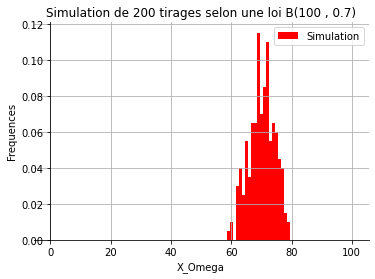

In [ ]:
# diagramme en bâtons loi Binomiale

# tabulation de la simulation
frequences = tabuler(X_Omega,echantillon)

#représentation
diagramme_batons(X_Omega, frequences)

plt.title('Simulation de '+ str(N)+' tirages selon une loi B('+str(n)+' , '+ str(p)+')')

### **3.4 Comparaison avec la loi théorique**

Rappeler la définition de la **combinaison** "k parmi n" et son mode de calcul.

Rappeler la probabilté P([X=k]) quand X suit une loi binomiale B(n,p)


*réponses :*
* **combinaison** : $ \binom{N}{k} = \frac{N!}{k!(N - k)!} $ où N! désigne le produit de tous les entiers de 1 à N, appelé **"factorielle"** de N

* **probabilité selon la loi binomiale** :

    $ X(\Omega) = [[O,n]] $

    et pour tout k dans $ X(\Omega), P([X=k]) = \binom{N}{k} . p^k . (1-p)^{n-k} $

In [ ]:
# loi théorique
def factorielle(n):
    f = 1
    for k in range(1,n+1):
        f = f * k
    return f
           
def combinaison(k,n):
    c = 1
    for m in range(n,n-k,-1):
        c = c * m
    c = int(c / factorielle(k))
    return c
           
           
probabilites = [combinaison(k,n)*p**k*(1-p)**(n-k) for k in range(n+1)]

modification de la fonction d'affichage pour incorporer la loi théorique :

In [ ]:
def diagramme_batons(X_Omega,tabule,probabilites):
    # tracer les diagrammes en bâtons
    plt.grid(True)
    largeur = (X_Omega[-1] - X_Omega[0])/100

    
    plt.bar(X_Omega, tabule, width = largeur, color = 'red', alpha = 1, label = 'Simulation')
    plt.bar(X_Omega, probabilites, width = 3*largeur, color = 'blue', alpha = 0.3, label = 'Probabilites theoriques')

    plt.xlabel('X_Omega')
    plt.ylabel('Frequences')
    plt.legend()

    ax = plt.gca() # récupération du paramétrage des axes

    ax.spines['left'].set_position('zero') # positionnement de l'axe des ordonnées à x = 0
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero') # positionnement de l'axe des abscisses à y = 0
    ax.spines['top'].set_color('none')

Text(0.5, 1.0, 'Simulation de 200 tirages selon une loi B(100 , 0.7)')

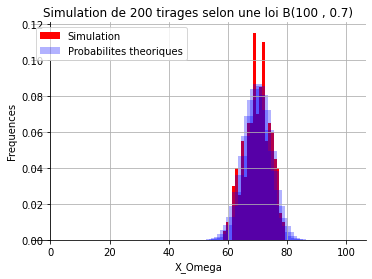

In [ ]:
diagramme_batons(X_Omega, frequences, probabilites)

plt.title('Simulation de '+ str(N)+' tirages selon une loi B('+str(n)+' , '+ str(p)+')')